In [1]:
import dmrg1 as dmrg1
import SpinSystems_2d as SS2d
import numpy as np
import matplotlib.pyplot as plt
from ncon import ncon
import MPO_class as MPO
import MPS_class as MPS
import seaborn as sns
import tdvp as tdvp1



In [2]:
Lx = 7
Ly = 7

L = Lx*Ly

In [3]:
h = 0
J = 1.
H = SS2d.IsingMPO_2D(Lx,Ly,h,J)

engine = dmrg1.DMRG1(H)
engine.initialize(64)

for i in range(20):
    engine.dmrg_step()#1e-12)

print('energy', engine.E, 'theo', -(2*Lx*Ly-Lx-Ly))

C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[0] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


energy -84.00000000000001 theo -84


In [4]:
time_engine = tdvp1.TDVP(engine.MPS,H)

def apply_flip(M,epsilon):
    theta = np.pi-epsilon
    flip = np.eye(2)*np.cos(theta/2) - 1j*np.sin(theta/2)*np.array([[0,1],[1,0]])
    for i in range(len(M)):
        M[i] = ncon([M[i],flip],[[-1,1,-3],[1,-2]])

In [5]:
mz_list = []
t_list = []

dt = 1.
k  = 1
t_list.append(0.)

time_engine.MPS.M[Lx//2*Ly+Ly//2] = ncon([time_engine.MPS.M[Lx//2*Ly+Ly//2],np.array([[0,1],[1,0]])],[[-1,1,-3],[1,-2]])
mz_list.append(MPO.return_LocalMz(time_engine.MPS))#.real.reshape(Lx,Ly))
#time_engine.initialize()
for j in range(101):
    print(j,' mz: ',mz_list[j][14])
    time_engine.initialize()

    # Evolve the state of t1->t2, t2-t1=0.5
    for _ in range(k):
        time_engine.time_step(dt/k)#,1e-10)
    apply_flip(time_engine.MPS.M, 0.1)
    t_list.append((j+1)*dt)
    mz_list.append(MPO.return_LocalMz(time_engine.MPS))#.real.reshape(Lx,Ly))
    


0  mz:  (-1+0j)
1  mz:  (0.9950041652780258+0j)
2  mz:  (-0.9934421620435067+0j)
3  mz:  (0.9887324504062311+0j)
4  mz:  (-0.9919213465699823+0j)
5  mz:  (0.9864497257006801+0j)
6  mz:  (-0.9902644046358372+0j)
7  mz:  (0.984891339406228+0j)
8  mz:  (-0.981568170061236+0j)
9  mz:  (0.9887647725925679+0j)
10  mz:  (-0.9856170007370904+0j)
11  mz:  (0.9918832300337388+0j)
12  mz:  (-0.993181867234383+0j)
13  mz:  (0.9924282157934807+0j)
14  mz:  (-0.9889184288548207+0j)
15  mz:  (0.9921372816699083+0j)
16  mz:  (-0.9891443565694716+0j)
17  mz:  (0.9900867988592683+0j)
18  mz:  (-0.9899173047951603+0j)
19  mz:  (0.9906794600025646+0j)
20  mz:  (-0.9886500924162251+0j)
21  mz:  (0.9902438640027761+0j)
22  mz:  (-0.9874667866359903+0j)
23  mz:  (0.9909194649306822+0j)
24  mz:  (-0.983670300441713+0j)
25  mz:  (0.9880052843395257+0j)
26  mz:  (-0.9907087390746946+0j)
27  mz:  (0.9861436454211537+0j)
28  mz:  (-0.9873986829822203+0j)
29  mz:  (0.9883756819895027+0j)
30  mz:  (-0.9913368447579

KeyboardInterrupt: 

In [7]:
mz_ = np.array(mz_list).reshape(len(mz_list),Lx,Ly)

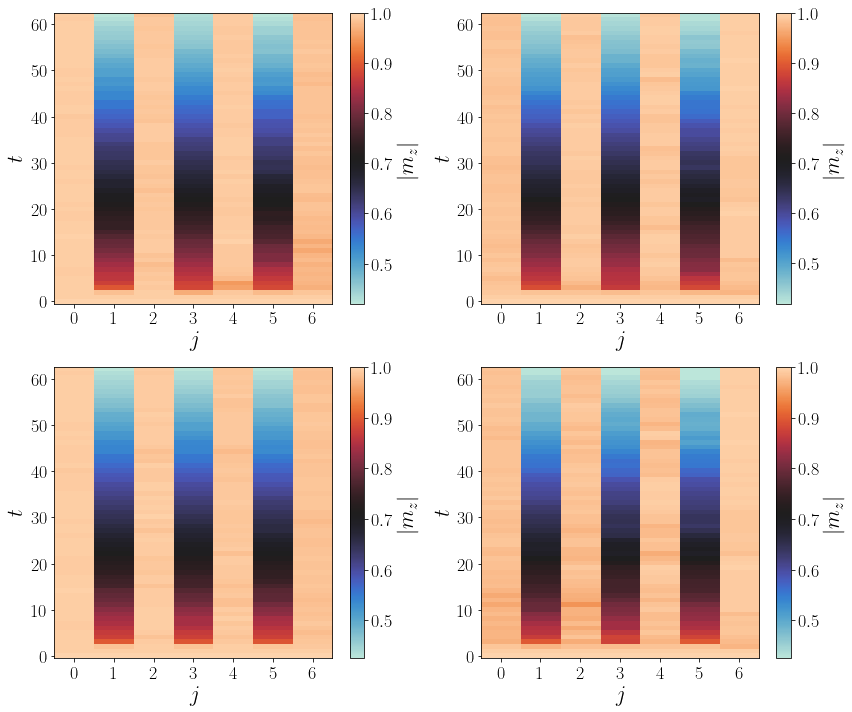

In [8]:
import seaborn as sns

plt.rc('text',usetex=True)
plt.figure(figsize=(12,10))

plt.subplot(221)
plt.imshow(np.abs(mz_[:,:,0]),origin='lower',cmap=sns.color_palette('icefire',as_cmap=True),aspect='auto')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
cb.set_label(r"$|m_z|$",fontsize=22)
plt.ylabel("$t$",fontsize=22)
plt.xlabel("$j$",fontsize=22)
plt.tick_params(labelsize=18)
plt.xticks(np.arange(Lx))

plt.subplot(222)
plt.imshow(np.abs(mz_[:,:,-1]),origin='lower',cmap=sns.color_palette('icefire',as_cmap=True),aspect='auto')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
cb.set_label(r"$|m_z|$",fontsize=22)
plt.xticks(np.arange(Lx))

plt.ylabel("$t$",fontsize=22)
plt.xlabel("$j$",fontsize=22)
plt.tick_params(labelsize=18)

plt.subplot(223)
plt.imshow(np.abs(mz_[:,0,:]),origin='lower',cmap=sns.color_palette('icefire',as_cmap=True),aspect='auto')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
cb.set_label(r"$|m_z|$",fontsize=22)
plt.ylabel("$t$",fontsize=22)
plt.xlabel("$j$",fontsize=22)
plt.tick_params(labelsize=18)
plt.xticks(np.arange(Lx))

plt.subplot(224)
plt.imshow(np.abs(mz_[:,-1,:]),origin='lower',cmap=sns.color_palette('icefire',as_cmap=True),aspect='auto')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
cb.set_label(r"$|m_z|$",fontsize=22)
plt.xticks(np.arange(Lx))

plt.clim(min(np.abs(mz_[:,0,:]).flatten()),max(np.abs(mz_[:,0,:]).flatten()))
plt.ylabel("$t$",fontsize=22)
plt.xlabel("$j$",fontsize=22)
plt.tick_params(labelsize=18)

plt.tight_layout()

plt.savefig("pm.png")

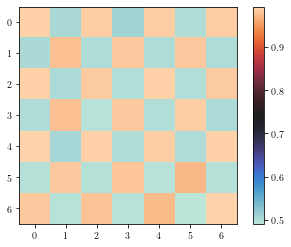

In [17]:
plt.imshow(np.abs(mz_[50].real),cmap=sns.color_palette('icefire',as_cmap=True))
plt.colorbar()

plt.savefig("perche.png")
#H.contractMPOMPS(time_engine.MPS)